In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
Sf=500 # Sampling rate in Hz
N=Sf # number of tpts
T=N/Sf # length of time window in seconds
nyq=Sf/2
freq_spacing=1/T
freqs=np.linspace(0,nyq,1+nyq/freq_spacing)

In [45]:
print(freqs[:4])
print(freqs[-4:])

[ 0.  1.  2.  3.]
[ 247.  248.  249.  250.]


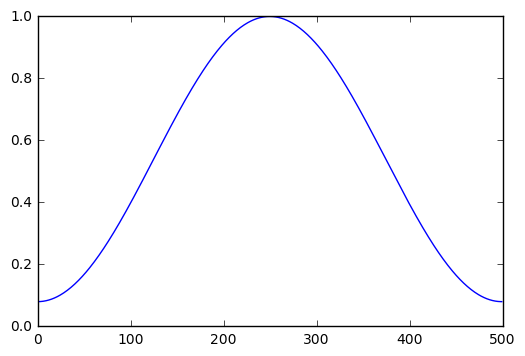

In [55]:
tpr=np.hamming(N)
plt.plot(tpr)

In [30]:
# Gaussian data
data=np.random.randn(N)

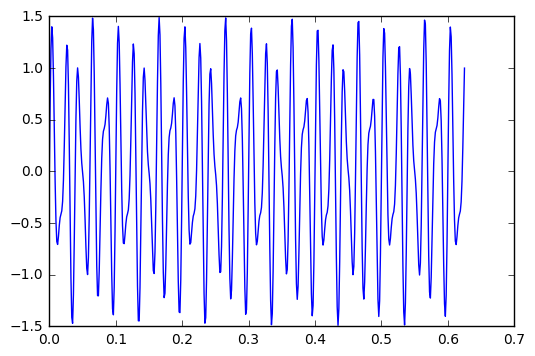

In [50]:
# Sin data
Ts = 1.0 / 800.0
x = np.linspace(0.0, N*Ts, N)
data = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x,data)

(500,)


ValueError: x and y must have same first dimension

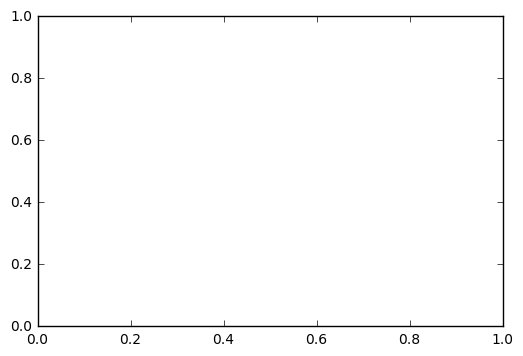

In [74]:
outpt=np.fft.rfft(data,N,norm='ortho')
outpt_tpr=np.fft.rfft(np.multiply(tpr,data),N,norm='ortho')
#outpt_tpr=np.fft.rfft(np.multiply(tpr,data),N)
print(outpt.shape)
outpt_tpr_pwr=np.multiply(outpt_tpr,np.conj(outpt_tpr))/N
plt.plot(freqs,10*np.log10(np.abs(outpt)))
plt.plot(freqs,10*np.log10(np.abs(outpt_tpr)),'r')
plt.plot(freqs,10*np.log10(outpt_tpr_pwr),'g--')
print(N)
print(len(freqs))

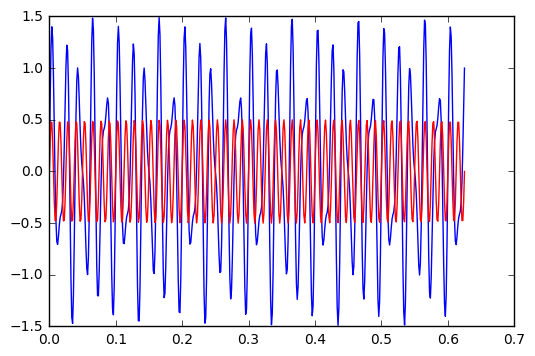

In [56]:
# Sin data for coherence analysis
Ts = 1.0 / 800.0
x = np.linspace(0.0, N*Ts, N)
data1 = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
data2 = 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x,data1,'b')
plt.plot(x,data2,'r')

(2.6602183744e-06+0j)


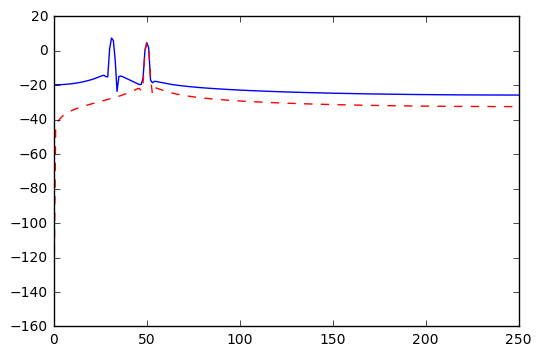

In [61]:
# compute FFT of both signals
fband1=(45,55) # perfect sync
fband1=(10,45) # no sync
outpt_tpr1=np.fft.rfft(np.multiply(tpr,data1),N,norm='ortho')
outpt_tpr2=np.fft.rfft(np.multiply(tpr,data2),N,norm='ortho')
#plot power spectrum
plt.plot(freqs,10*np.log10(np.abs(outpt_tpr1)))
plt.plot(freqs,10*np.log10(np.abs(outpt_tpr2)),'r--')

# Compute coherence in the select band 
x_spec=np.multiply(outpt_tpr1,np.conj(outpt_tpr2))
x_spec_mn=np.mean(x_spec[fband1[0]:fband1[1]])
spec1=np.multiply(outpt_tpr1,np.conj(outpt_tpr1))
spec2=np.multiply(outpt_tpr2,np.conj(outpt_tpr2))
coh1=np.abs(x_spec_mn**2)/(np.mean(spec1[fband1[0]:fband1[1]])*np.mean(spec2[fband1[0]:fband1[1]]))
print(coh1)

In [77]:
def band_coh(x,y,Sf,N,f_band_ids):
    """Computes the coherence between time series with a list of frequency bands
    Inputs:
      x, y - two 1D time series of equal length
      Sf - sampling rate
      N - # of time points to use for FFT. If N># of time points, 0 padding will be used. If N<# of time points, data is cropped.
      f_band_ids - list of tuples indicating the *index* of the lower and upper bound of each frequency band.
      
    Outputs:
      coh - vector of len(f_band_ids) with the coherence of each frequency band. Possible values range from 0 to 1.
      """

    dft_x=np.fft.rfft(x,N)
    dft_y=np.fft.rfft(y,N)

    xx=np.multiply(x,np.conj(x))/N
    yy=np.multiply(y,np.conj(y))/N
    xy=np.multiply(x,np.conj(y))/N
    
    n_band=len(f_band_ids)
    coh=np.zeros(n_band)
    for a in range(n_band):
        mn_xx=np.mean(xx[f_band_ids[a][0]:f_band_ids[a][1]])
        mn_yy=np.mean(yy[f_band_ids[a][0]:f_band_ids[a][1]])
        mn_xy=np.mean(xy[f_band_ids[a][0]:f_band_ids[a][1]])
        coh[a]=(np.abs(mn_xy)**2)/(mn_xx*mn_yy)
        
    return coh

In [80]:
# compute coherence in a few freqency bands
fbands=list()
fbands.append((1,10)) 
fbands.append((10,45)) 
fbands.append((45,55)) # perfect sync
fbands.append((55,65))
coh=band_coh(np.multiply(tpr,data1),np.multiply(tpr,data2),Sf,N,fbands)
print(coh)

[ 0.51092646  0.03745224  0.72156129  0.20197385]


In [96]:
bro=np.fft.fftfreq(501,1/500)
print(len(bro))
print(bro[249])
print(bro[250])
print(bro[251])
real_freqs=bro[:int(np.ceil(len(bro)/2))]

501
248.502994012
249.500998004
-249.500998004


In [95]:
real_freqs[:4]
real_freqs[-4:]

array([ 246.50698603,  247.50499002,  248.50299401,  249.500998  ])